# Testing Parametric and Non-Parametric Distribution Tests

In [5]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

### Read Data in and Describe

In [6]:
ess = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [7]:
ess.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.594000e+03,8594.000000,8586.000000,8580.000000,8555.000000,8569.000000,8563.000000,8579.000000,8500.000000,8584.000000,8355.000000,8577.000000
mean,3.954938e+04,6.500000,3.861985,5.559907,6.005143,5.319874,7.694616,5.192563,2.748941,1.497204,47.470736,1.384867
std,6.267259e+05,0.500029,2.019689,2.233700,2.129866,2.173449,1.735904,1.457643,0.905477,0.500021,18.397369,0.486592
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.052000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.714000e+03,6.500000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.745000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,62.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [8]:
ess.shape

(8594, 13)

In [9]:
ess.dtypes

cntry       object
idno       float64
year         int64
tvtot      float64
ppltrst    float64
pplfair    float64
pplhlp     float64
happy      float64
sclmeet    float64
sclact     float64
gndr       float64
agea       float64
partner    float64
dtype: object

In [10]:
ess.head(5)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [11]:
ess.year.unique()

array([6, 7])

6 refers to 2012, while 7 refers to 2014

In [12]:
ess.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

### Clean the Data

In [13]:
#Determine missing values across dataframe

missing_values_count = ess.isnull().sum()
print(missing_values_count)

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64


In [14]:
#For the purpose of this exercise, drop all NaNs
ess = ess.dropna()

Tune some of our variables to be categorical

In [15]:
#Change years to a more categorical form
ess['year'] = np.where((ess['year'] == 6), 'Year-2012', 'Year-2014')

In [16]:
#Change year to categorical data type
ess['year'] = ess['year'].astype('category')

In [17]:
#Change gender to a more categorical form
ess['gndr'] = np.where((ess['gndr'] == 1.0), 'Male', 'Female')

In [18]:
#Change gender to categorical data type
ess['gndr'] = ess['gndr'].astype('category')

In [19]:
#Change years to a more categorical form
ess['partner'] = np.where((ess['partner'] == 1.0), 'Live Together', 'Do not Live Together')

In [20]:
ess['partner'] = ess['partner'].astype('category')

Drop superfluous column (idno)

In [21]:
#Drop IdNo
ess = ess.drop(['idno'], 1)

### Explore the Data

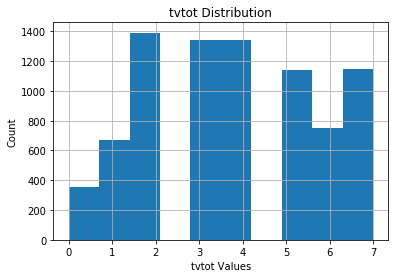

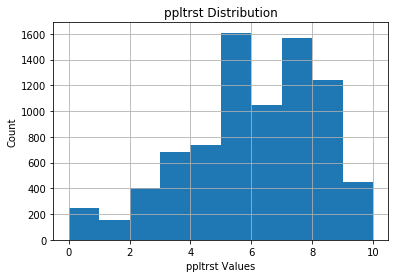

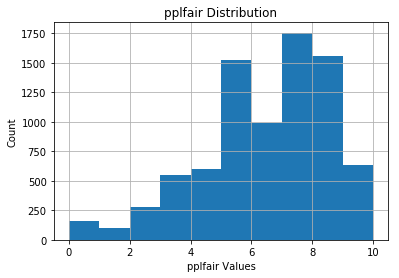

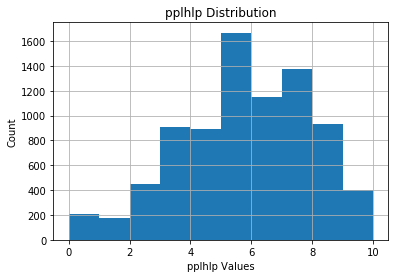

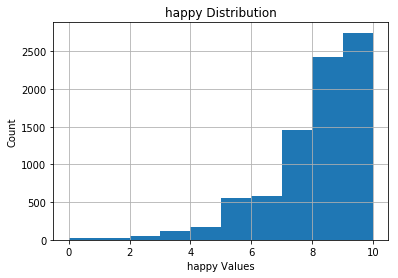

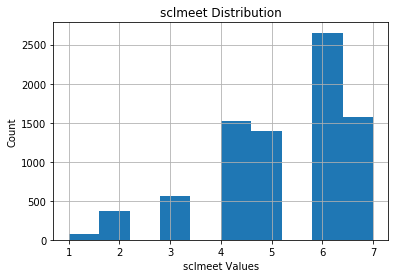

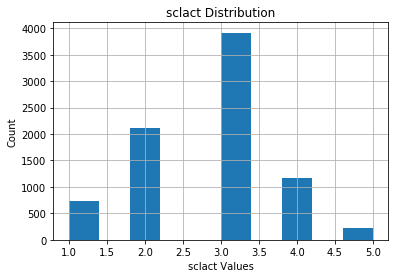

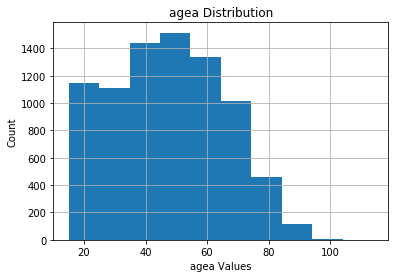

In [22]:
# Plot histograms for all continuous data
for col in ess.dtypes[ess.dtypes == 'float64'].index:
    ess[col].hist()
    plt.title(col + " Distribution")
    plt.xlabel(col + " Values")
    plt.ylabel("Count")
    plt.show()

### Analytical Question 1: Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [23]:
#Create dataframes for each country
CH = ess.loc[ess['cntry'] == 'CH']
CZ = ess.loc[ess['cntry'] == 'CZ']
DE = ess.loc[ess['cntry'] == 'DE']
ES = ess.loc[ess['cntry'] == 'ES']
NO = ess.loc[ess['cntry'] == 'NO']
SE = ess.loc[ess['cntry'] == 'SE']

In [33]:
#Printing the means for each group.
cntry_dfs = [CH, CZ, DE, ES, NO, SE]
for df in cntry_dfs:
    print(round(df.ppltrst.mean(), 2))

5.73
4.38
5.22
5.03
6.62
6.14


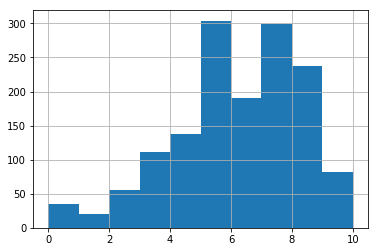

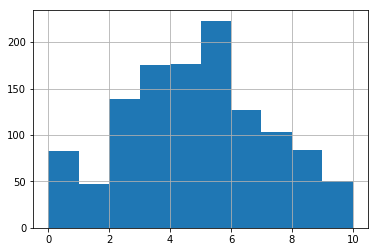

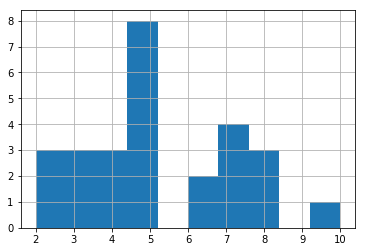

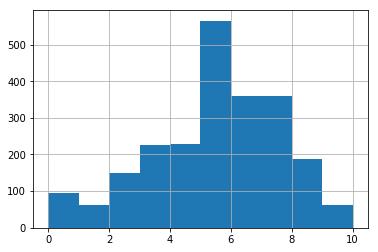

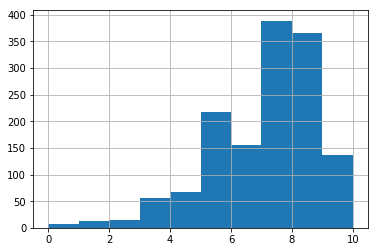

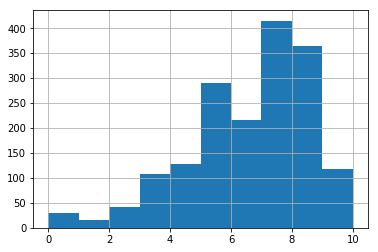

In [48]:
#Plot histogram of ppltrst for each country
for df in cntry_dfs:
    df.ppltrst.hist()
    plt.show()

In [35]:
F, p = stats.f_oneway(
    CH['ppltrst'],
    CZ['ppltrst'],
    DE['ppltrst'],
    ES['ppltrst'],
    NO['ppltrst'],
    SE['ppltrst'])

#F statistic.
print(F)

#A p < .05 would lead us to believe the group means were not all similar in the population.
print(p)

208.90176779877532
3.007054579992942e-210


In [44]:
print(stats.ttest_ind(CH['ppltrst'], CZ['ppltrst']))
print(stats.ttest_ind(CH['ppltrst'], DE['ppltrst']))
print(stats.ttest_ind(CH['ppltrst'], ES['ppltrst']))
print(stats.ttest_ind(CH['ppltrst'], NO['ppltrst']))
print(stats.ttest_ind(CH['ppltrst'], SE['ppltrst']))

print(stats.ttest_ind(CZ['ppltrst'], DE['ppltrst']))
print(stats.ttest_ind(CZ['ppltrst'], ES['ppltrst']))
print(stats.ttest_ind(CZ['ppltrst'], NO['ppltrst']))
print(stats.ttest_ind(CZ['ppltrst'], SE['ppltrst']))

print(stats.ttest_ind(DE['ppltrst'], ES['ppltrst']))
print(stats.ttest_ind(DE['ppltrst'], NO['ppltrst']))
print(stats.ttest_ind(DE['ppltrst'], SE['ppltrst']))

print(stats.ttest_ind(ES['ppltrst'], NO['ppltrst']))
print(stats.ttest_ind(ES['ppltrst'], SE['ppltrst']))

print(stats.ttest_ind(NO['ppltrst'], SE['ppltrst']))

Ttest_indResult(statistic=15.591363135057318, pvalue=1.577882893133148e-52)
Ttest_indResult(statistic=1.2281665245214957, pvalue=0.21957713515614072)
Ttest_indResult(statistic=9.713677236895192, pvalue=4.774257100119087e-22)
Ttest_indResult(statistic=-12.337782837087929, pvalue=4.026338929630907e-34)
Ttest_indResult(statistic=-5.697466908716274, pvalue=1.3262456423465526e-08)
Ttest_indResult(statistic=-1.8430857763525381, pvalue=0.06555658224957261)
Ttest_indResult(statistic=-8.309880420426058, pvalue=1.354273943195643e-16)
Ttest_indResult(statistic=-27.721113028176227, pvalue=1.4219730269573634e-148)
Ttest_indResult(statistic=-21.70732061674138, pvalue=5.16340155261975e-97)
Ttest_indResult(statistic=0.45198303829097924, pvalue=0.6513235093523141)
Ttest_indResult(statistic=-4.023969828877652, pvalue=6.018831950947124e-05)
Ttest_indResult(statistic=-2.347876040495308, pvalue=0.018991568086238746)
Ttest_indResult(statistic=-23.3658637414511, pvalue=9.11675844002967e-113)
Ttest_indResult(

**Chosen Approach:** Parametric - Used one-way ANOVA because for the most part the data was somewhat normal

### Analytical Question 2: Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [34]:
# Printing the means for each group.
cntry_dfs = [CH, CZ, DE, ES, NO, SE]
for df in cntry_dfs:
    print(round(df.happy.mean(), 2))

8.11
6.86
7.59
7.5
8.09
7.92


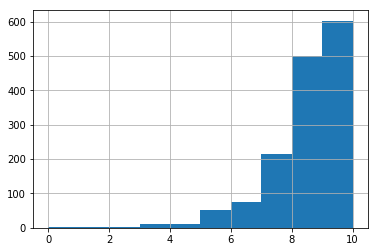

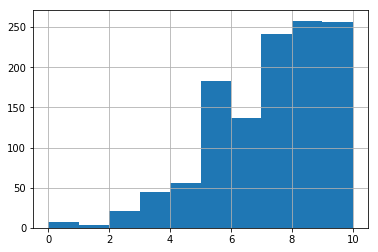

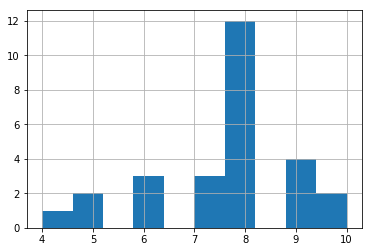

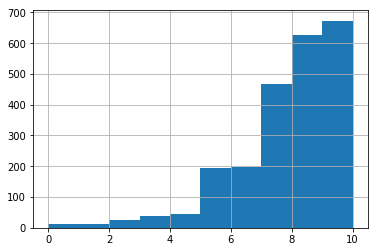

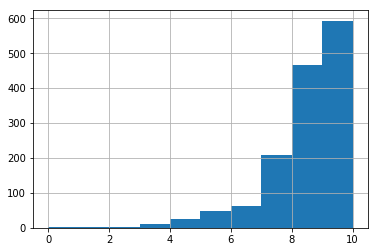

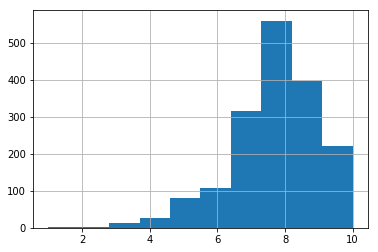

In [49]:
#Plot histogram of happy for each country
for df in cntry_dfs:
    df.happy.hist()
    plt.show()

In [64]:
#Kruskal-Wallace Test

#Join all ratings together into a list, then ranking them.
CH_rank = stats.rankdata(CH['happy'].tolist())
CZ_rank = stats.rankdata(CZ['happy'].tolist())
DE_rank = stats.rankdata(DE['happy'].tolist())
ES_rank = stats.rankdata(ES['happy'].tolist())
NO_rank = stats.rankdata(NO['happy'].tolist())
SE_rank = stats.rankdata(SE['happy'].tolist())

#Disable warning
pd.options.mode.chained_assignment = None

#Add ranks to dfs
CH['happy_rank'] = CH_rank
CZ['happy_rank'] = CZ_rank
DE['happy_rank'] = DE_rank
ES['happy_rank'] = ES_rank
NO['happy_rank'] = NO_rank
SE['happy_rank'] = SE_rank

# Average rank per group.
print(CH['happy_rank'].apply(np.mean))
print(CZ['happy_rank'].apply(np.mean))
print(DE['happy_rank'].apply(np.mean))
print(ES['happy_rank'].apply(np.mean))
print(NO['happy_rank'].apply(np.mean))
print(SE['happy_rank'].apply(np.mean))

#Print the test statistic followed by the probability of getting this result if the groups were not different.
stats.kruskal(     
    CH['happy'],
    CZ['happy'],
    DE['happy'],
    ES['happy'],
    NO['happy'],
    SE['happy'])

0        622.0
1       1064.0
2        263.5
3       1365.5
4        622.0
6          1.0
7       1365.5
8       1064.0
9        263.5
10      1064.0
11       263.5
12      1064.0
13       622.0
14       622.0
15      1064.0
16       622.0
17       118.0
18      1064.0
19       622.0
20       263.5
21       622.0
22      1064.0
23      1064.0
24      1064.0
25       263.5
26       622.0
27      1064.0
28      1365.5
29       622.0
30        54.0
         ...  
1516    1365.5
1517     622.0
1518     118.0
1519    1365.5
1520     622.0
1521    1064.0
1522       4.0
1523     622.0
1524     622.0
1525    1064.0
1526     263.5
1527     118.0
1528    1064.0
1529     263.5
1530    1064.0
1531      54.0
1532    1064.0
1533     622.0
1534    1064.0
1535     263.5
1536    1064.0
1537     622.0
1538     622.0
1539     622.0
1540     622.0
1541    1365.5
1542    1064.0
1543     263.5
1544     622.0
1545     622.0
Name: happy_rank, Length: 1475, dtype: float64
1546    1039.5
1547     822.5
1548    

KruskalResult(statistic=450.71321732949133, pvalue=3.44687186022373e-95)

**Chosen Approach:** Non-Parametric - Used Kruskal-Wallace test due to non-normality of data

### Analytical Question 3: Who reported watching more TV in 2012, men or women?

**Chosen Approach:** 

### Analytical Question 4: Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

**Chosen Approach:** 

### Analytical Question 5: Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

**Chosen Approach:** 

### Analytical Question 5: Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

**Chosen Approach:** 